In [1]:
import cv2
from pdftolatex.block_detector import segment

img = cv2.imread('test.png')
bboxes = segment(img, False)

In [2]:
import numpy as np

print(img.shape) 

page_img = cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)

box = bboxes[3]
print(box.x, box.y, box.width, box.height)

(1835, 1418, 3)
120 403 562 314


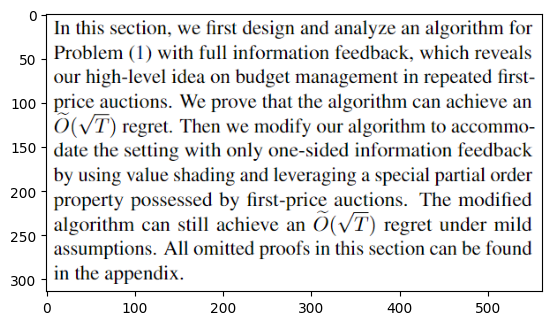

In [3]:
import matplotlib.pyplot as plt

img_part = page_img[box.y:box.y+box.height, box.x:box.x+box.width, :]
plt.imshow(img_part)
plt.show()

In [4]:
import pytesseract

content = pytesseract.image_to_data(img_part, output_type=pytesseract.Output.DICT)

In [7]:
" ".join(content['text'])

"    In this section, we first design and analyze an algorithm for  Problem (1) with full information feedback, which reveals  our high-level idea on budget management in repeated first-  price auctions. We prove that the algorithm can achieve an  OWT ') regret. Then we modify our algorithm to accommo-  date the setting with only one-sided information feedback  by using value shading and leveraging a special partial order  property possessed by first-price auctions. The modified  algorithm can still achieve an O(VT) regret under mild  assumptions. All omitted proofs in this section can be found  in the appendix."

#### png -> jpg

In [2]:
from PIL import Image

# 打开PNG图像
png_image = Image.open("doc/pic.png")

# 将图像转换为RGB模式（如果它不是的话）
rgb_image = png_image.convert('RGB')

# 保存为JPG格式
rgb_image.save("doc/detecting_steps.jpg", "JPEG")

print("转换完成！")

转换完成！
